In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans


In [11]:
df = pd.read_csv("dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [13]:
df.shape

(114000, 21)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [19]:
for col in df.columns:
    if df[col].dtype != 'object':
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


In [21]:
df.drop_duplicates(inplace=True)


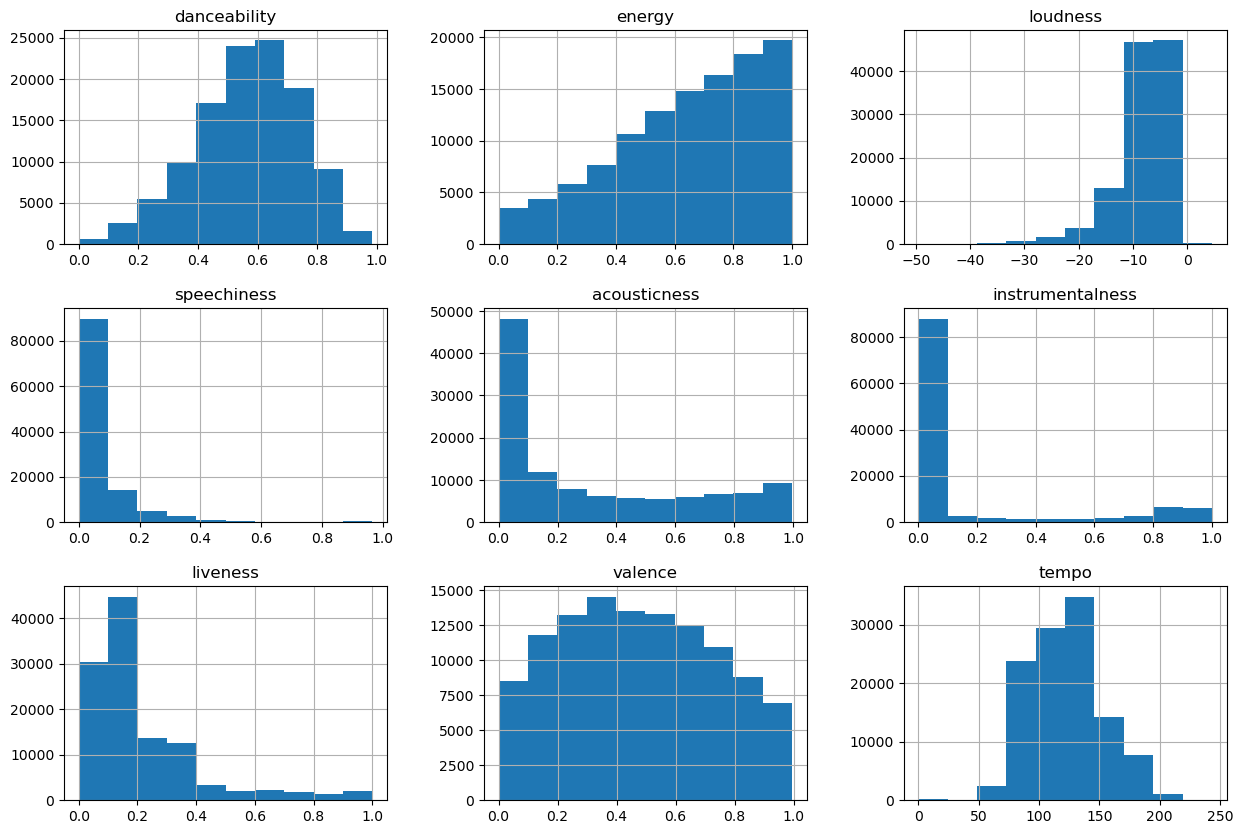

In [23]:
audio_features = [
    'danceability','energy','loudness','speechiness',
    'acousticness','instrumentalness','liveness',
    'valence','tempo'
]

df[audio_features].hist(figsize=(15,10))
plt.show()


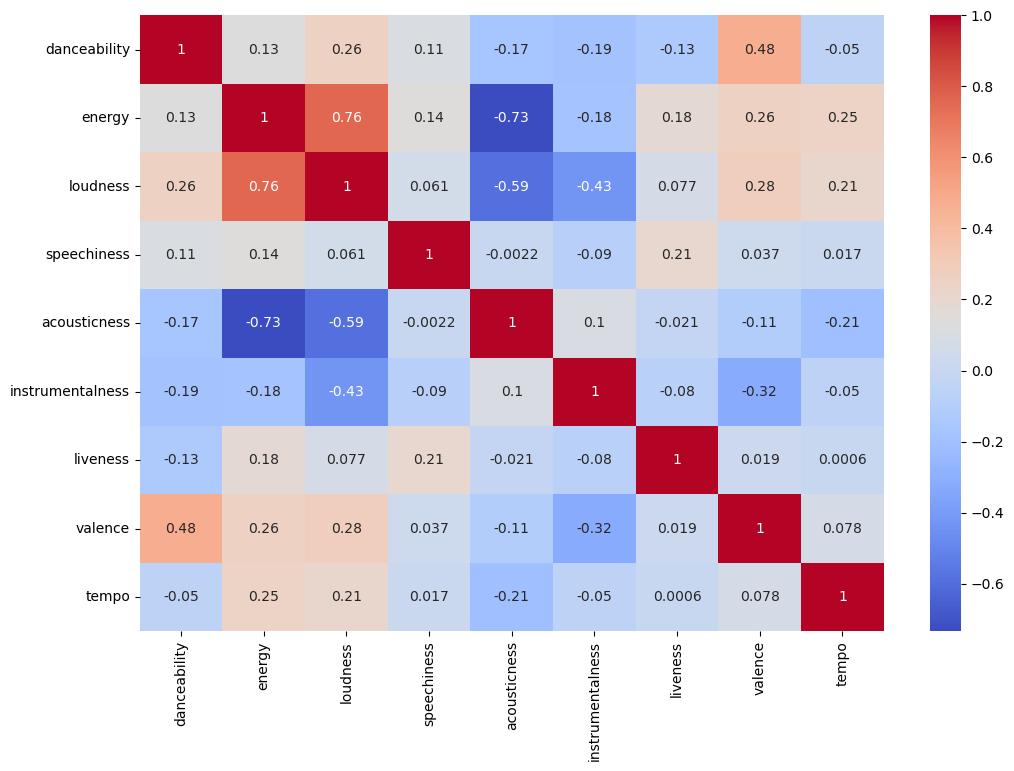

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df[audio_features].corr(), annot=True, cmap='coolwarm')
plt.show()


In [27]:
features = [
    'danceability','energy','loudness',
    'acousticness','valence','tempo'
]

X = df[features]
y = df['popularity']


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [31]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)


In [33]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


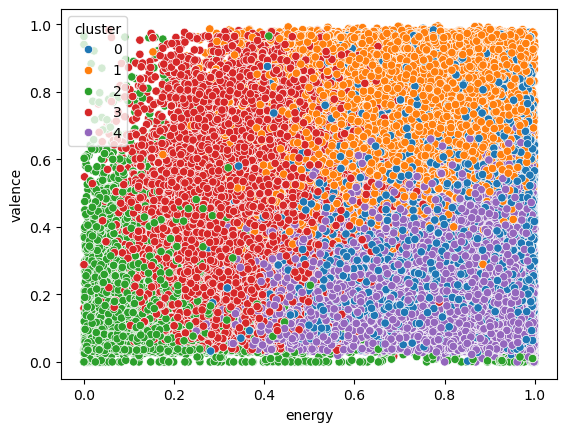

In [35]:
sns.scatterplot(
    x=df['energy'],
    y=df['valence'],
    hue=df['cluster'],
    palette='tab10'
)
plt.show()


In [37]:
knn = NearestNeighbors(n_neighbors=10, metric='cosine')
knn.fit(X_scaled)


NearestNeighbors(metric='cosine', n_neighbors=10)

In [39]:
def recommend_songs(song_name, df, features):
    if song_name not in df['track_name'].values:
        return "Song not found in dataset"

    song_index = df[df['track_name'] == song_name].index[0]
    song_vector = scaler.transform([df.loc[song_index, features]])

    distances, indices = knn.kneighbors(song_vector)

    recommendations = df.iloc[indices[0]]
    recommendations = recommendations[recommendations.index != song_index]

    return recommendations[['track_name','artists','track_genre','popularity']]


In [41]:
recommend_songs("Shape of You", df, features)


C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,track_name,artists,track_genre,popularity
11555,Under the Tree,Sam Palladio,british,40
9867,Noite do prazer,Brylho,brazil,43
103938,Noite do prazer,Brylho,soul,43
21641,Tene,Larry Gaaga;Flavour,dancehall,0
95400,Brujeria,El Gran Combo De Puerto Rico,salsa,65
21467,Green Light,Olamide,dancehall,56
95452,Pueden Decir,Gilberto Santa Rosa,salsa,30
95512,Separemos Nuestras Vidas,Jerry Rivera,salsa,30
66187,Un Dia Especial,Dora The Explorer,kids,18


In [43]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

df['rf_popularity'] = rf.predict(X_scaled)


In [44]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

df['lr_popularity'] = lr.predict(X_scaled)


In [45]:
df['popular_class'] = (df['popularity'] >= df['popularity'].median()).astype(int)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, (y_train >= y_train.median()).astype(int))


LogisticRegression(max_iter=1000)

In [46]:
df['final_score'] = (
    df['rf_popularity'] * 0.6 +
    df['lr_popularity'] * 0.4
)

df.sort_values(by='final_score', ascending=False, inplace=True)


In [50]:
df[['track_name','artists','track_genre','final_score']].head(10)
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,liveness,valence,tempo,time_signature,track_genre,cluster,rf_popularity,lr_popularity,popular_class,final_score
68304,68304,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,97,243716,False,0.650,0.715,...,0.126,0.187,106.672,4,latino,4,94.07,36.876736,1,71.192694
67359,67359,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,97,243716,False,0.650,0.715,...,0.126,0.187,106.672,4,latin,4,94.07,36.876736,1,71.192694
89405,89405,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,97,243716,False,0.650,0.715,...,0.126,0.187,106.672,4,reggaeton,4,94.07,36.876736,1,71.192694
88407,88407,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,97,243716,False,0.650,0.715,...,0.126,0.187,106.672,4,reggae,4,94.07,36.876736,1,71.192694
68303,68303,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,0.218,0.850,124.980,4,latino,1,95.57,33.268513,1,70.649405
